In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [4]:
nsubjects = 10
subjects = list(zip( list(range(0, nsubjects)), np.random.normal(60, 20, nsubjects) ))

trials_per_subject_pair = 7
responses = ["yes", "no"]
conditions = ["obs", "act"] # 1 is observe, 2 is act

In [5]:
dyaddata = []
for exp_id in range(50):
    # randomly generate pair of subjects
    pair = np.random.choice(nsubjects, 2, replace=False)
    s1 = subjects[pair[0]]
    s2 = subjects[pair[1]]
    
    for t in range(trials_per_subject_pair):
        rt = np.random.normal(700, 400, 1)
        correct_response = np.random.choice( responses, 1 )[0]
        selection = np.random.choice( responses, 1 )[0]
        condition = np.random.choice( conditions, 1 )[0]
        
        dyaddata.append( [exp_id, s1[0], s1[1], s2[0], s2[1], t, condition, correct_response, selection, rt[0]] )

df = pd.DataFrame(dyaddata, columns=["experiment", "subject1", "subject1_threshold", "subject2", "subject2_threshold", "trial_number", "s1_condition", "signalpresence", "selection", "rt"])

In [7]:
# Computing number of times condition was repeated

repeat = []

for _, e in df.groupby(['experiment']):
    count = 0
    p = ''
    
    for s in e.s1_condition:
        if s == p: count += 1
        else: count = 0

        p = s
        repeat.append(count)

df['repeatc'] = repeat

In [17]:
df['correct'] = df['signalpresence'] == df['selection']

In [18]:
df.head(10)

,experiment,subject1,subject1_threshold,subject2,subject2_threshold,trial_number,s1_condition,signalpresence,selection,rt,repeatc,correct
0,0,2,52.113312,0,43.751788,0,obs,no,no,-121.987091,0,True
1,0,2,52.113312,0,43.751788,1,obs,no,yes,801.638673,1,False
2,0,2,52.113312,0,43.751788,2,act,no,no,1164.054775,0,True
3,0,2,52.113312,0,43.751788,3,act,yes,yes,73.921898,1,True
4,0,2,52.113312,0,43.751788,4,act,yes,yes,478.708290,2,True
5,0,2,52.113312,0,43.751788,5,obs,yes,yes,1238.204766,0,True
6,0,2,52.113312,0,43.751788,6,obs,no,yes,262.209629,1,False
7,1,3,49.954188,0,43.751788,0,act,no,yes,877.812074,0,False
8,1,3,49.954188,0,43.751788,1,act,yes,no,705.679666,1,False
9,1,3,49.954188,0,43.751788,2,obs,no,yes,728.738262,0,False


## RTs

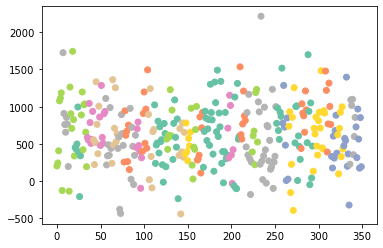

In [6]:
plt.scatter(df.index, df.rt, c=df.subject1, cmap="Set2");

## Response Time When Correct and Incorrect

/home/hunaid/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


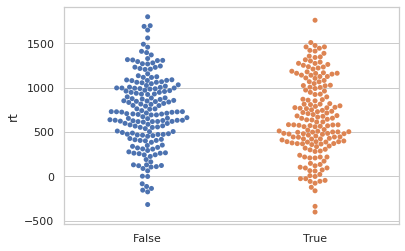

In [10]:
sns.swarmplot(df.signalpresence == df.selection, df.rt);

## Being Correct Plot Against Threshold

In [ ]:
plt.scatter(df.th)

## Probability of Same Response as Dyad's Response in the Previous Trial

/home/hunaid/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


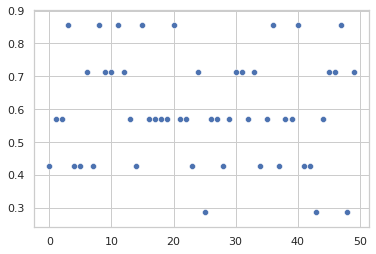

In [11]:
prob_repeat = []

for exp in df.experiment.unique():
    # filter out each experiment
    _ = df[df.experiment == exp]
    trials = _.shape[0]
    
    # identify indices where condition switched from act to obs
    switch = (_.s1_condition == _.s1_condition.shift()) == False
    _ = _[switch]
    
    # identify indices where a repeat choice was made
    repeat = (_.selection == _.selection.shift()).shape[0]
    
    prob_repeat.append(repeat/trials)

sns.scatterplot(range(len(prob_repeat)), prob_repeat);

## Probability of Same Response as One's Own Response in the Previous Trial

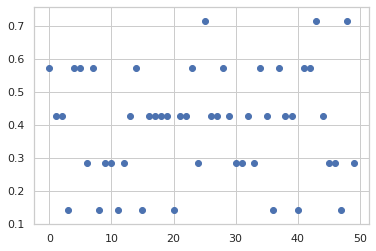

In [12]:
prob_repeat = []
for exp in df.experiment.unique():
    # filter out each experiment
    _ = df[df.experiment == exp]
    trials = _.shape[0]
    
    # identify indices where condition *did not* switch from act to obs
    switch = (_.s1_condition == _.s1_condition.shift()) == True
    _ = _[switch]
    
    # identify indices where a repeat choice was made
    repeat = (_.selection == _.selection.shift()).shape[0]
    
    prob_repeat.append(repeat/trials)

plt.scatter(range(len(prob_repeat)), prob_repeat)

## Response Times Coloured by Switch from Observation to Action

In [8]:
? plt.subplots

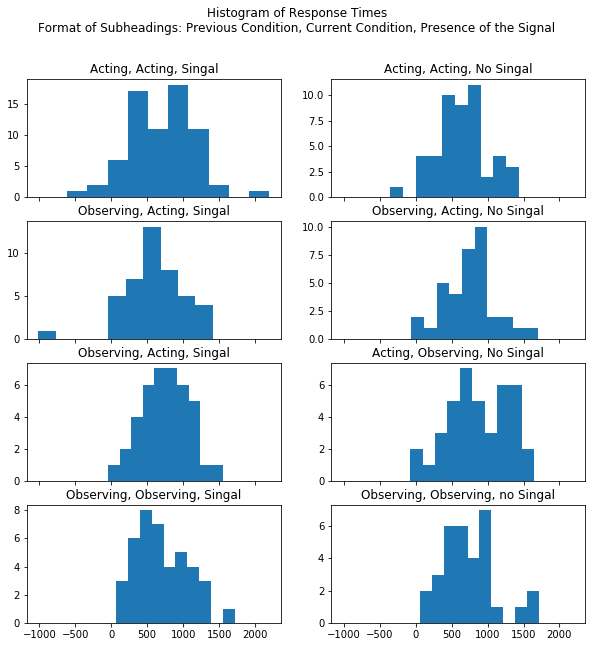

In [77]:
fig, ax = plt.subplots(4, 2, sharex=True, figsize=(10, 10))

# identify indices where condition switched from obs to act
obstoact = (df.s1_condition == "act") & (df.s1_condition.shift() == "obs")
acttoobs = (df.s1_condition == "obs") & (df.s1_condition.shift() == "act")
acttoact = (df.s1_condition == "act") & (df.s1_condition.shift() == "act")
obstoobs = (df.s1_condition == "obs") & (df.s1_condition.shift() == "obs")

# identify indices where the signal was present or not
signalpresence = df.signalpresence == 'yes'

fig.suptitle("Histogram of Response Times\nFormat of Subheadings: Previous Condition, Current Condition, Presence of the Signal")

ax[0][0].hist(df[acttoact & signalpresence].rt);
ax[0][0].set_title("Acting, Acting, Signal");

ax[0][1].hist(df[acttoact & ~signalpresence].rt);
ax[0][1].set_title("Acting, Acting, No Signal");

ax[1][0].hist(df[obstoact & signalpresence].rt);
ax[1][0].set_title("Observing, Acting, Signal");

ax[1][1].hist(df[obstoact & ~signalpresence].rt);
ax[1][1].set_title("Observing, Acting, No Signal");

ax[2][0].hist(df[acttoobs & signalpresence].rt);
ax[2][0].set_title("Observing, Acting, Signal");

ax[2][1].hist(df[acttoobs & ~signalpresence].rt);
ax[2][1].set_title("Acting, Observing, No Signal");

ax[3][0].hist(df[obstoobs & signalpresence].rt);
ax[3][0].set_title("Observing, Observing, Signal");

ax[3][1].hist(df[obstoobs & ~signalpresence].rt);
ax[3][1].set_title("Observing, Observing, no Signal");


## Sequence plot of response times

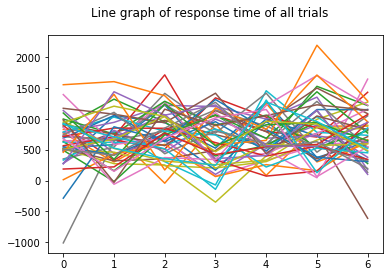

In [79]:
fig, ax = plt.subplots()
fig.suptitle("Line graph of response time of all trials")

for exp in df.experiment.unique():
    # filter out each experiment
    _ = df[df.experiment == exp]
    
    ax.plot(_['trial_number'], _['rt'])


## Lag Against Being Correct

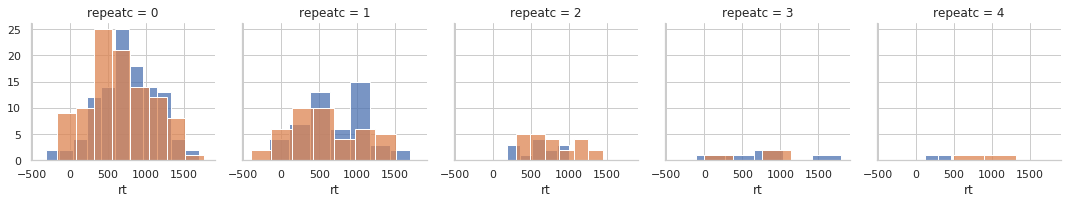

In [25]:
p = sns.FacetGrid(df, col='repeatc', hue='correct')
p.map(sns.histplot, 'rt');